In [1]:
print('Hello world!')

Hello world!


In [1]:
#project aim is to predict price of BIT-COIN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [3]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [4]:
#convert Dates to DateTime Type
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [6]:
df = df.sort_index()
df.head() #also notice how the DATE column format has changed

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [7]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


Text(0, 0.5, 'Daily bitcoin price')

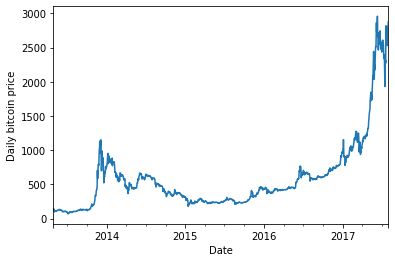

In [8]:
data = df.copy()

data['Close'].plot()
plt.ylabel('Daily bitcoin price')

In [9]:
data2 = data['Close']
data2.head()

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
2017-07-28    2809.01
2017-07-27    2671.78
Name: Close, dtype: float64

In [10]:
weekday = data.groupby(data2.index.day_of_week)['Close'].mean()
weekday

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

In [11]:
weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
weekday

Mon     588.738655
Tue     582.402658
Wed     581.731216
Thur    585.565135
Fri     583.876622
Sat     584.545180
Sun     582.802511
Name: Close, dtype: float64

Text(0.5, 0, 'Days of the year')

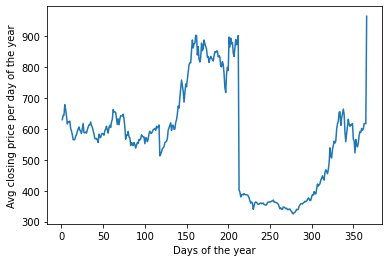

In [13]:
days = data2.index.day_of_year
data.groupby(days)['Close'].mean().plot()
plt.ylabel('Avg closing price per day of the year')
plt.xlabel('Days of the year')

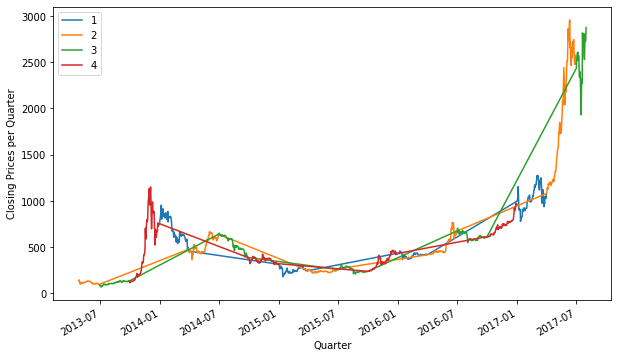

In [18]:
#each line represents a Quarter of the year (1,2,3,4)
plt.figure(figsize=(10,6))
data.groupby(data2.index.quarter)['Close'].plot()
plt.ylabel('Closing Prices per Quarter')
plt.xlabel('Quarter')
plt.legend(['1', '2', '3', '4'])

In [19]:
data['DayOfWeek'] = data.index.day_of_week
data.head()

,Open,High,Low,Close,Volume,Market Cap,DayOfWeek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3


In [20]:
def assign_labels(feature):
    return 'weekdays' if feature < 5 else 'weekends'

data['dayofweek'] = data['DayOfWeek'].apply(assign_labels)
data.head()

,Open,High,Low,Close,Volume,Market Cap,DayOfWeek,dayofweek
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0,weekdays
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6,weekends
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5,weekends
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4,weekdays
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3,weekdays


<AxesSubplot:title={'center':'Week Days'}, xlabel='Date'>

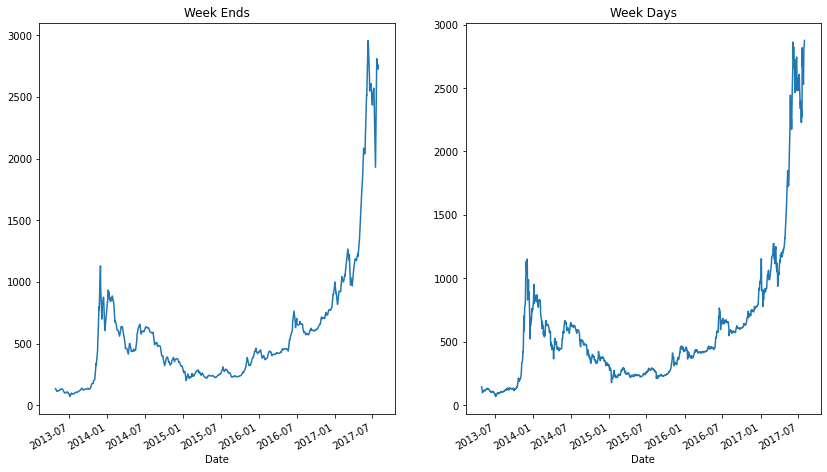

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

data[data['dayofweek']=='weekends']['Close'].plot(ax=ax[0], title='Week Ends')
data[data['dayofweek']=='weekdays']['Close'].plot(ax=ax[1], title='Week Days')

<AxesSubplot:xlabel='Date'>

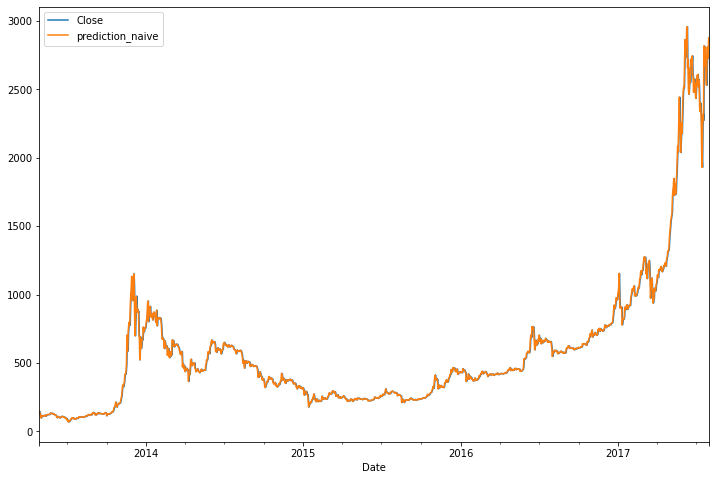

In [23]:
data['prediction_naive'] = data['Close'].shift(1)
data[['Close', 'prediction_naive']].plot(figsize=(12, 8))

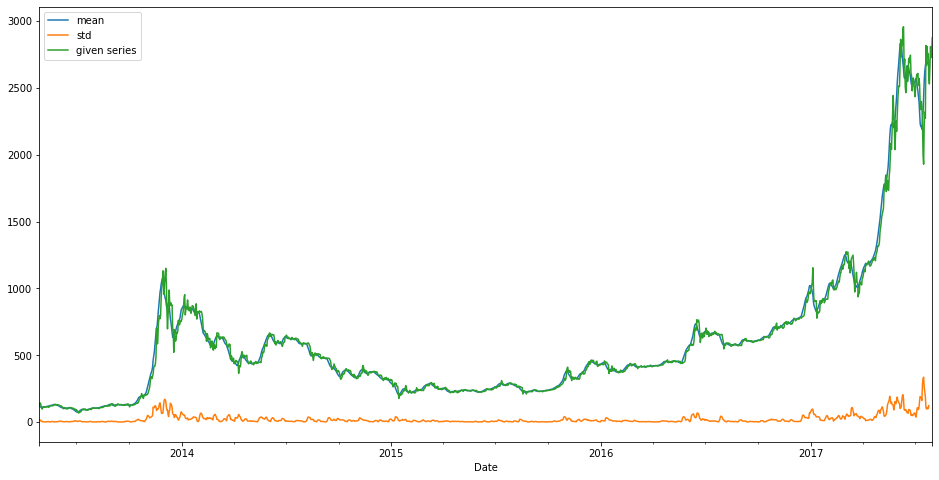

In [24]:
_mean = data['Close'].rolling(window=7).mean()
_std = data['Close'].rolling(window=7).std()

plt.figure(figsize=(16, 8))
_mean.plot(label='mean')
_std.plot(label='std')
data['Close'].plot(label='given series')
plt.legend()